In [9]:
# set data path

train_path = 'train.csv'

In [10]:
## check data

with open(train_path,'r') as train_file:
    print(train_file.readline())
    print(train_file.readline())

ArticleId,Text,Category

1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (Â£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and prac

In [11]:
## check data

# with open(test_path,'r') as train_file:
#     print(train_file.readline())
#     print(train_file.readline())

In [12]:
# GRADED FUNCTION: remove_stopwords
def remove_stopwords(sentence):
    
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()
    
    ### START CODE HERE
    final_sentence = []
    
    for word in sentence.split(' '):
        if word not in stopwords:
            final_sentence.append(word)
            
    sentence = ' '.join(final_sentence)
    
    ### END CODE HERE
    return sentence

In [13]:
# read data and store

import csv

def get_data(data_path):
    
    reviews = []
    labels =[]
    with open(data_path,'r') as file:

        data = csv.reader(file)

        # skip first row
        next(data)

        for row in data:
            sentence = remove_stopwords(row[1])
            reviews.append(sentence)
            labels.append(row[2])
            
    return reviews, labels

In [14]:
## get train and test data

sentences, labels = get_data(train_path)

In [15]:
len(sentences)

1490

## Subwords Tokenization

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
vocab_size = 1000
max_subword_length= 5

In [18]:
# set sub word tokenizer
sub_word_tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences,
                                                                               vocab_size,
                                                                               max_subword_length=max_subword_length)

# How big is the vocab size?
print("Vocab size is ", sub_word_tokenizer.vocab_size)

Vocab size is  1002


In [19]:
# Check that the tokenizer works correctly
num = 5
print(sentences[num])
encoded = sub_word_tokenizer.encode(sentences[num])
print(encoded)

howard  truanted play snooker  conservative leader michael howard admitted used play truant spend time school friends snooker hall.  mr howard said time jack s snooker hall llanelli 1950s not done  lasting damage . told times educational supplement truancy  bad  said  firm action  needed. mr howard also called return o-levels classroom discipline.  mr howard eventually left llanelli grammar school - snooker hall - go cambridge university. said:  don t think s done lasting damage. made snooker world champion.  might occasions left early afternoon.   m just honest. think truancy bad thing firm action taken deal it.  another player failed win snooker s world championship - jimmy  whirlwind   white - previously admitted missing lessons  instead spending days smoky halls.  tony meo [another player] used spend spare time   mr white said   loved game atmosphere.  school went window. went started taking time off.  mr howard s fellow welshman ray reardon - known fellow professionals  dracula  -

In [20]:
sub_word_tokenizer.decode(encoded)

'howard  truanted play snooker  conservative leader michael howard admitted used play truant spend time school friends snooker hall.  mr howard said time jack s snooker hall llanelli 1950s not done  lasting damage . told times educational supplement truancy  bad  said  firm action  needed. mr howard also called return o-levels classroom discipline.  mr howard eventually left llanelli grammar school - snooker hall - go cambridge university. said:  don t think s done lasting damage. made snooker world champion.  might occasions left early afternoon.   m just honest. think truancy bad thing firm action taken deal it.  another player failed win snooker s world championship - jimmy  whirlwind   white - previously admitted missing lessons  instead spending days smoky halls.  tony meo [another player] used spend spare time   mr white said   loved game atmosphere.  school went window. went started taking time off.  mr howard s fellow welshman ray reardon - known fellow professionals  dracula  

In [29]:
# Separately print out each subword, decoded
# for i in encoded:
#   print(sub_word_tokenizer.decode([i]))

### Replace sentence data with encoded subwords

Now, we'll create the sequences to be used for training by actually encoding each of the individual sentences. This is equivalent to text_to_sequences with the Tokenizer we used in earlier exercises.
m

In [21]:
sentences_encoded = []
for i, sentence in enumerate(sentences):
#     print(i, sentence)
    sentences_encoded.append(sub_word_tokenizer.encode(sentence))

In [22]:
print(sentences_encoded[2])

[716, 778, 46, 174, 184, 639, 439, 778, 452, 357, 778, 398, 857, 396, 778, 70, 45, 391, 278, 76, 105, 150, 263, 286, 278, 258, 214, 403, 4, 716, 778, 269, 778, 476, 91, 46, 174, 401, 735, 6, 269, 778, 452, 855, 8, 252, 237, 90, 183, 5, 44, 46, 93, 130, 2, 136, 23, 286, 580, 452, 855, 8, 84, 172, 9, 252, 237, 847, 3, 113, 21, 4, 43, 695, 8, 2, 421, 581, 25, 493, 589, 1, 76, 105, 150, 263, 795, 615, 407, 526, 2, 23, 232, 244, 54, 362, 178, 847, 3, 14, 86, 125, 796, 797, 778, 531, 778, 156, 6, 796, 603, 407, 526, 2, 633, 227, 39, 10, 46, 190, 1, 86, 186, 22, 218, 206, 139, 10, 113, 443, 778, 322, 40, 78, 656, 179, 113, 135, 3, 46, 174, 327, 285, 76, 105, 150, 263, 242, 168, 14, 675, 156, 6, 795, 797, 778, 407, 526, 2, 401, 735, 10, 452, 855, 8, 51, 9, 588, 856, 153, 190, 1, 307, 563, 44, 46, 93, 130, 2, 99, 372, 407, 526, 2, 401, 735, 10, 336, 16, 538, 849, 3, 258, 214, 403, 4, 543, 778, 407, 526, 2, 465, 15, 862, 3, 119, 742, 198, 778, 135, 855, 861, 1, 532, 385, 165, 798, 798, 193, 44, 

In [37]:
# ## similary encode test data

# test_data_encoded = []
# for i, sentence in enumerate(test_data):
# #     print(i, sentence)
#     test_data_encoded.append(sub_word_tokenizer.encode(sentence))

In [24]:
max_length = 50
trunc_type='post'
padding_type='post'

In [27]:
# Pad all sequences
sequences_padded = pad_sequences(sentences_encoded, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

In [31]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Tokenize the labels

In [32]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(training_labels)

train_labels_final = tokenizer.texts_to_sequences(training_labels)
test_labels_final = tokenizer.texts_to_sequences(testing_labels)

In [37]:
# # Make labels into numpy arrays for use with the network later
train_labels_final = np.array(train_labels_final)
test_labels_final = np.array(test_labels_final)

In [46]:
#pd.Series(train_labels_final).unique()

## Create Model and Fit

In [47]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 6)                 102       
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
Total params: 16,144
Trainable params: 16,144
Non-trainable params: 0
_________________________________________________________________


In [48]:
# compile model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# fit model

num_epochs = 15
model.fit(training_sequences,train_labels_final,
          epochs=num_epochs,
          validation_data=(testing_sequences, test_labels_final))

Epoch 1/15
38/38 [==============================] - 1s 6ms/step - loss: 1.7753 - accuracy: 0.1795 - val_loss: 1.7583 - val_accuracy: 0.1577
Epoch 2/15
38/38 [==============================] - 0s 2ms/step - loss: 1.7373 - accuracy: 0.1795 - val_loss: 1.7235 - val_accuracy: 0.1577
Epoch 3/15
38/38 [==============================] - 0s 3ms/step - loss: 1.6969 - accuracy: 0.2013 - val_loss: 1.6870 - val_accuracy: 0.2483
Epoch 4/15
38/38 [==============================] - 0s 3ms/step - loss: 1.6524 - accuracy: 0.2919 - val_loss: 1.6493 - val_accuracy: 0.3221
Epoch 5/15
38/38 [==============================] - 0s 3ms/step - loss: 1.6027 - accuracy: 0.3884 - val_loss: 1.6080 - val_accuracy: 0.3557
Epoch 6/15
38/38 [==============================] - 0s 3ms/step - loss: 1.5479 - accuracy: 0.4346 - val_loss: 1.5632 - val_accuracy: 0.3993
Epoch 7/15
38/38 [==============================] - 0s 3ms/step - loss: 1.4857 - accuracy: 0.4933 - val_loss: 1.5150 - val_accuracy: 0.4362
Epoch 8/15
38/38 [==

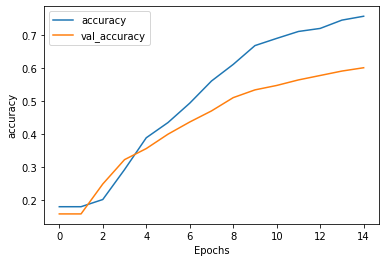

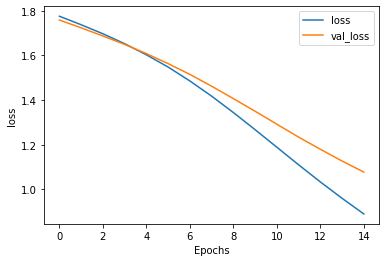

In [50]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(model.history, "accuracy")
plot_graphs(model.history, "loss")